In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Bhavya837/netflix-pandas-analysis/main/netflix_cleaned.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
#analysis starts
#basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [25]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [32]:
df.fillna({'director' : 'unknown'}, inplace =True)
df.fillna({'cast' : 'unknown'}, inplace =True)

In [34]:
df.fillna({'country' : 'not available'}, inplace =True)
df.fillna({'rating' : 'not available'}, inplace =True)
df.fillna({'duration' : 'unknown'}, inplace =True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,not available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


In [40]:
df.dropna(subset=['date_added'],inplace =True)
#use fillna and drop na to fill or drop the missing values accordingly.
#As there were only a few records were missing in the date_added column, they were dropped.
#Remaining columns were filled with unknown or not available using fillna.

In [39]:
df['type'].value_counts()
# number of movies vs tv shows

,count
type,
Movie,6131
TV Show,2666


In [43]:
df[df['director']!= 'unknown']['director'].value_counts().head(10)

#Top 10 directors with most movies made(excluded the value unknown, as it is just a placeholder for nulls)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


In [46]:
df[df['cast']!='unknown'] ['cast'].str.split(',').explode().value_counts().head(10)
#Top 10 actors with most movies made(excluded the value unknown, as it is just a placeholder for nulls)

,count
cast,
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Paresh Rawal,25
Yuki Kaji,25


In [77]:
df.loc[df['release_year'] == 2020, ['title', 'director']]

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams"
17,Falsa identidad,unknown
32,Sex Education,unknown
34,Tayo and Little Wizards,unknown
...,...,...
5972,#cats_the_mewvie,Michael Margolis
7594,Norm of the North: Family Vacation,Anthony Bell
8099,Straight Up,James Sweeney
8125,Super Wings,unknown


In [74]:
df.loc[(df['type'] == 'Movie') & (df['release_year'] > 2015) & (df['country'] == 'India')].head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,delay
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021,4
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2021,4
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,2021-09-02,2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...,2021,1
190,s191,Movie,Thimmarusu,Sharan Koppisetty,"Satya Dev, Priyanka Jawalkar, Brahmaji",India,2021-08-28,2021,TV-14,125 min,"Dramas, International Movies",Eight years after a young man is framed for mu...,2021,0
203,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,2021-08-27,2016,TV-MA,124 min,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...,2021,5


In [76]:
df.iloc[:5, :3]


,show_id,type,title
0,s1,Movie,Dick Johnson Is Dead
1,s2,TV Show,Blood & Water
2,s3,TV Show,Ganglands
3,s4,TV Show,Jailbirds New Orleans
4,s5,TV Show,Kota Factory


In [49]:
top_country = df[df['country']!='not available']['country'].str.split(',').explode().value_counts().head(1)
top_country

,count
country,
United States,3205


In [60]:
df[(df['release_year']==2020) & (df['country']== 'Mexico')].head()
# movies or tv shows released in mexico in the year 2020

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
17,s18,TV Show,Falsa identidad,unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
282,s283,Movie,La diosa del asfalto,Julián Hernández,"Ximena Romo, Mabel Cadena, Alejandra Herrera, ...",Mexico,"August 11, 2021",2020,TV-MA,127 min,"Dramas, Independent Movies, International Movies",A woman from a tough neighborhood outside Mexi...
1351,s1352,Movie,"Our Lady of San Juan, Four Centuries of Miracles",Noé González,"Alejandro Peña Arenzana, Alejandra Yañez Reyno...",Mexico,"February 2, 2021",2020,TV-PG,123 min,"Dramas, Faith & Spirituality, International Mo...","In this dramatization, the Virgin Mary works a..."
1857,s1858,Movie,The Three Deaths of Marisela Escobedo,Carlos Pérez Osorio,unknown,Mexico,"October 14, 2020",2020,TV-MA,110 min,"Documentaries, International Movies",This documentary examines a mother's tireless ...
1901,s1902,Movie,You've Got This,Salvador Espinosa,"Mauricio Ochmann, Esmeralda Pimentel, Matteo G...",Mexico,"October 2, 2020",2020,TV-MA,112 min,"Comedies, International Movies, Romantic Movies",An ad creative and a successful exec have a gr...


In [62]:
df[df['listed_in'].str.contains('Documentaries', case= False, na= False)].head()
# genre is documentaries
#used string function to achieve this

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",unknown,not available,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,unknown,not available,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,not available,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",not available,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."


<Axes: xlabel='date_added'>

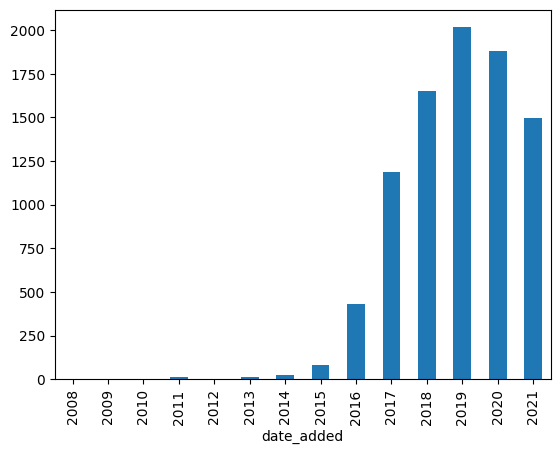

In [64]:
df['date_added']=pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar')

In [69]:
df['year_added']=df['date_added'].dt.year
df['delay']= df['year_added']-df['release_year']
df['delay'].describe()
#delay of uploading on platform after release

,delay
count,8797.000000
mean,4.688417
std,8.786998
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


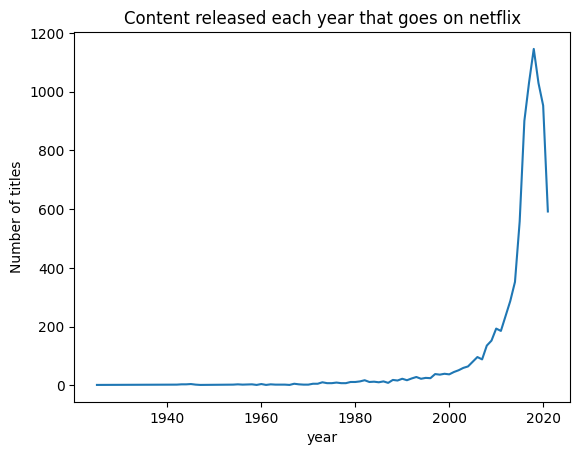

In [72]:
import matplotlib.pyplot as plt
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Content released each year that goes on netflix")
plt.xlabel('year')
plt.ylabel('Number of titles')
plt.show()

In [92]:
df['duration'].sample(10)

,duration
7552,88 min
1773,1 Season
8259,102 min
3913,111 min
8247,100 min
74,2 Seasons
7279,1 Season
6671,3 Seasons
8584,88 min
8385,131 min


In [94]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = (
    movies['duration']
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['duration'] = (
    tv_shows['duration']
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

In [95]:
print(movies['duration'].head())
print(tv_shows['duration'].head())

0      90.0
6      91.0
7     125.0
9     104.0
12    127.0
Name: duration, dtype: float64
1    2.0
2    1.0
3    1.0
4    2.0
5    1.0
Name: duration, dtype: float64


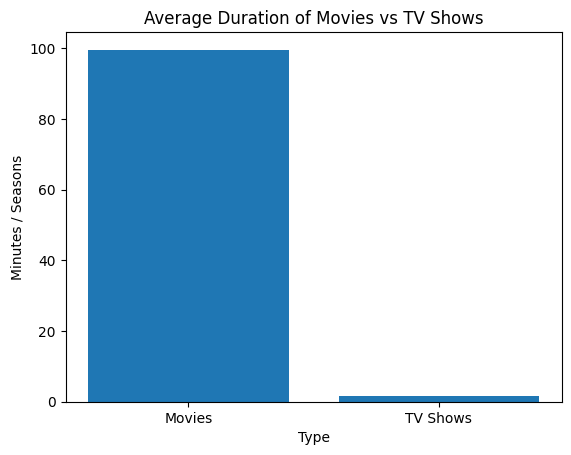

In [96]:
import matplotlib.pyplot as plt

plt.bar(['Movies', 'TV Shows'], [movies['duration'].mean(), tv_shows['duration'].mean()])
plt.title('Average Duration of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Minutes / Seasons')
plt.show()

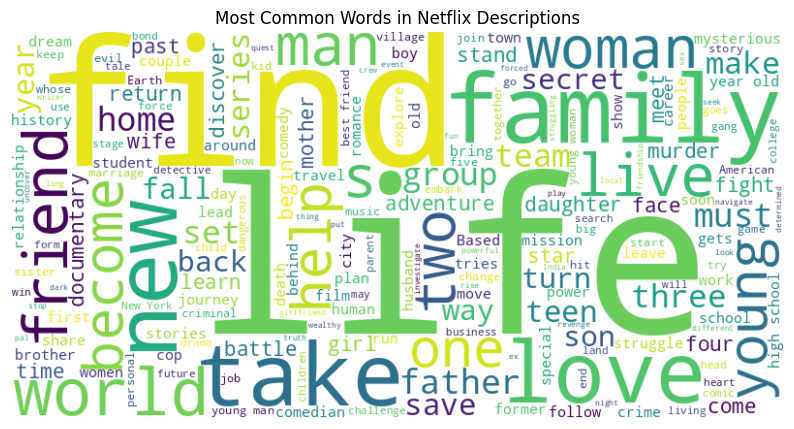

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into one string
text = ' '.join(df['description'].dropna())

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions')
plt.show()

In [100]:
df.to_csv('netflix_cleaned.csv', index=False)

from google.colab import files
files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>